# Machine Learning Techniques

Clustering

In [4]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [5]:
vgresult = pd.read_csv('cleaned-Video-Game-dataset.csv')

The cluster with the highest mean global sales is 2.
The genres in this cluster are: Sports, Platform, Racing, Role-Playing, Puzzle, Misc, Shooter, Simulation, Action


<Figure size 1200x600 with 0 Axes>

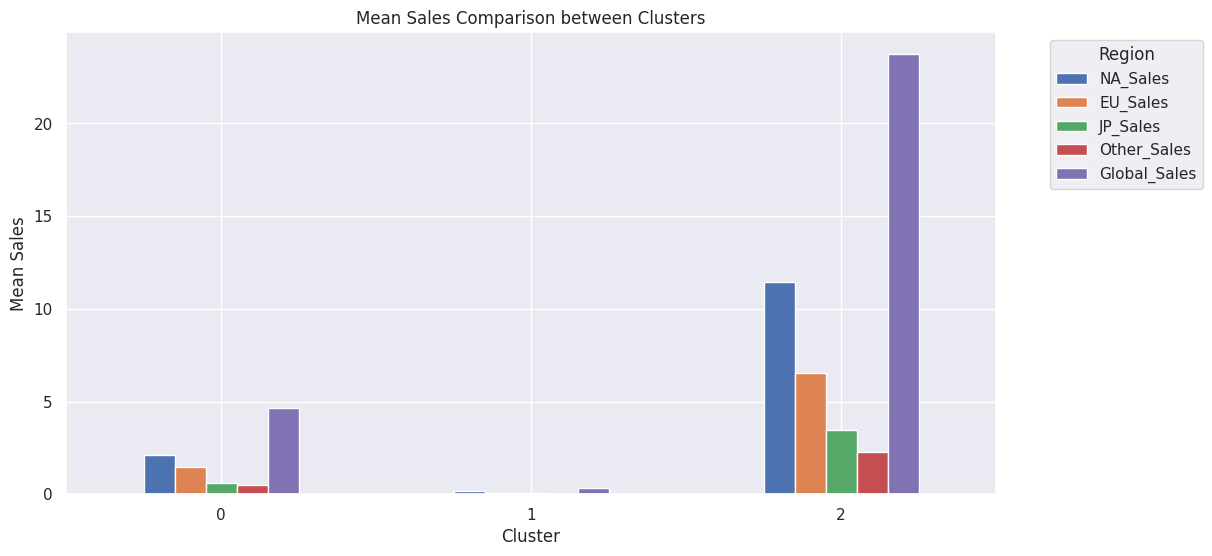

In [12]:
from sklearn.cluster import KMeans

# Assuming vgresult is a DataFrame containing the data
X = vgresult[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

# Normalize the data
X_normalized = (X - X.mean()) / X.std()

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(X_normalized)

# Add the cluster labels to the DataFrame
vgresult.loc[:, 'Cluster'] = kmeans.labels_
vgresult.to_csv('vgsales-cluster.csv')
# Calculate the mean sales for each cluster
cluster_means = vgresult.groupby('Cluster')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean()

# Find the cluster with the highest mean global sales
best_cluster = cluster_means['Global_Sales'].idxmax()

# Get the genres in the best cluster
best_cluster_genres = vgresult[vgresult['Cluster'] == best_cluster]['Genre'].unique()

print(f"The cluster with the highest mean global sales is {best_cluster}.")
print(f"The genres in this cluster are: {', '.join(best_cluster_genres)}")

# Plot the mean sales for each region for each cluster
plt.figure(figsize=(12, 6))
cluster_means.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Cluster')
plt.ylabel('Mean Sales')
plt.title('Mean Sales Comparison between Clusters')
plt.xticks(rotation=0)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=62586f1a-5f5e-459f-afe7-2b73319ce813' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>